## Regularized Linear Regression and Bias v.s.Variance

In this exercise, you will implement regularized linear regression and use it to
study models with different bias-variance properties.implement regularized linear regres-
sion to predict the amount of water flowing out of a dam using the change
of water level in a reservoir. In the next half, you will go through some diag-
nostics of debugging learning algorithms and examine the effects of bias v.s.
variance.

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io  # To load the data stored in matlab format
from scipy.optimize import minimize #To use the advanced optimization algorithm
%matplotlib inline

Data = scipy.io.loadmat('./Files/ex5data1.mat') #This a dictionary
print(Data.keys())

#Training set
Xtrain = Data['X']
#Inserting the bias unit
Xtrain = np.insert(Xtrain,0,1,axis=1)
Ytrain = Data['y']

#Cross-Validation set
Xcv = Data['Xval']
Ycv = Data['yval']

#Testing set
Xtest = Data['Xtest']
Ytest = Data['ytest']

m_train = Ytrain.size #no of training samples
m_cv = Ycv.size
m_test = Ytest.size

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])


### Visualizing the data

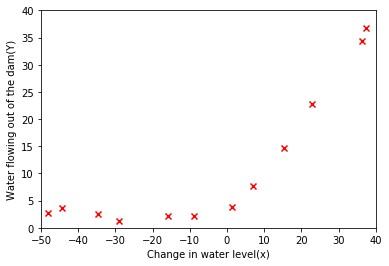

In [52]:
plt.scatter(Xtrain[:,1],Ytrain,c='red',marker='x')
plt.xlabel('Change in water level(x)')
plt.ylabel('Water flowing out of the dam(Y)')
plt.xlim(-50,40)
plt.ylim(0,40)
plt.show()

Hypothesis function used:  h<sub>&#952;</sub>(x) = &#952;<sub>0</sub> + &#952;<sub>1</sub>X

In [73]:
def CostFn(x,y,theta,r): #here 'r' is the Regularization parameter
    h = x.dot(theta.reshape(-1,1))
    J = (1/(2*m_train))*(np.sum(np.square(h-y)) + r*np.sum(np.square(theta[1:])))
    return J

In [74]:
def Gradient(x,y,theta,r):
    h = x.dot(theta)
    """Here the since we dont want to regularized the bias unit we 
       make the 1st row of theta to be zero which is done by the command
       np.r_[[[0]],Theta_initial[1:].reshape(-1,1)]
    """
    G = (1/m_train)*(x.T.dot(h-y))+ r*np.r_[[[0]],theta[1:].reshape(-1,1)]
    return(G.flatten())

In [85]:
Theta_initial = np.ones((Xtrain.shape[1],1))
Initial_Cost = CostFn(Xtrain,Ytrain,Theta_initial,0)
Initial_Gradient = Gradient(Xtrain,Ytrain,Theta_initial,0)
print("Initial_Cost",Initial_Cost)
print("Initial_Gradient",Initial_Gradient)

Initial_Cost 303.9515255535976
Initial_Gradient [-15.30301567 598.16741084]


In [91]:
def LinearRegression(x,y,r):
    outPut = minimize(CostFn,Theta_initial, args=(x,y,r), method=None, jac=Gradient,
                   options={'maxiter':100})
    return(outPut)

In [92]:
result = LinearRegression(Xtrain,Ytrain,0)

ValueError: shapes (2,) and (12,1) not aligned: 2 (dim 0) != 12 (dim 0)